In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import matplotlib.font_manager as font_manager
from matplotlib import rcParams

# Add every font at the specified location
font_dir = ["../fonts"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
rcParams["font.family"] = "umr10"
rcParams["font.size"] = 16

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import geojson
from descartes import PolygonPatch

In [4]:
df_bicycle_dataset = pd.read_csv("../dataset/processed/processed_dataset.csv")
df_geo_location_bicycle_dataset = pd.read_csv(
    "../dataset/processed/processed_geolocation_dataset.csv"
)

In [5]:
df_bicycle_dataset.head()

,uid,bike_number,start_time,end_time,rental_place,return_place,duration
0,65533380,57114,2019-03-15 10:21:55,2019-03-15 10:28:18,Świdnicka / Piłsudskiego (Hotel Scandic),Świdnicka / Piłsudskiego (Hotel Scandic),6
1,65533368,57092,2019-03-15 10:21:32,2019-03-15 10:28:23,Świdnicka / Piłsudskiego (Hotel Scandic),Świdnicka / Piłsudskiego (Hotel Scandic),6
2,65533283,57060,2019-03-15 10:18:19,2019-03-15 10:32:18,Świdnicka / Piłsudskiego (Hotel Scandic),Świdnicka / Piłsudskiego (Hotel Scandic),13
3,65533213,57115,2019-03-15 10:15:20,2019-03-15 10:32:21,Świdnicka / Piłsudskiego (Hotel Scandic),Świdnicka / Piłsudskiego (Hotel Scandic),17
4,65533616,57114,2019-03-15 10:32:19,2019-03-15 10:34:08,Świdnicka / Piłsudskiego (Hotel Scandic),Świdnicka / Piłsudskiego (Hotel Scandic),1


In [6]:
df_geo_location_bicycle_dataset.head()

,station_number,station_name,number_of_bikes_available,number_of_bikes_racks,latitude,longitude,coordinates
0,15001,Plac Dominikański (Galeria Dominikańska),14,16.0,51.108004,17.039528,"(17.039528, 51.108004)"
1,15002,"Dworzec Główny, południe",7,12.0,51.097108,17.036110,"(17.03611, 51.097108)"
2,15003,Rynek,43,16.0,51.109782,17.030175,"(17.030175, 51.109782)"
3,15004,Dworzec Główny,19,16.0,51.099750,17.036228,"(17.036228, 51.09975)"
4,15005,Nowowiejska / Jedności Narodowej,5,10.0,51.124879,17.045844,"(17.045844, 51.124879)"


In [7]:
graph = nx.from_pandas_edgelist(
    df_bicycle_dataset,
    source="rental_place",
    target="return_place",
    edge_attr="duration",
    create_using=nx.DiGraph(),
)

In [8]:
# wroclaw_map = Basemap(
#     projection="merc",
#     llcrnrlon=16.85,
#     llcrnrlat=51.00,
#     urcrnrlon=17.16,
#     urcrnrlat=51.17,
#     lat_ts=0,
#     resolution="f",
#     suppress_ticks=True,
# )

In [9]:
# mx, my = wroclaw_map(
#     df_geo_location_bicycle_dataset["longitude"].values,
#     df_geo_location_bicycle_dataset["latitude"].values,
# )
# pos = {}
# for count, elem in enumerate(df_geo_location_bicycle_dataset["station_name"]):
#     pos[elem] = (mx[count], my[count])

In [10]:
with open("../dataset/geojson/wroclaw.geojson") as json_file:
    json_data = geojson.load(json_file)

In [11]:
polygons = json_data["features"]

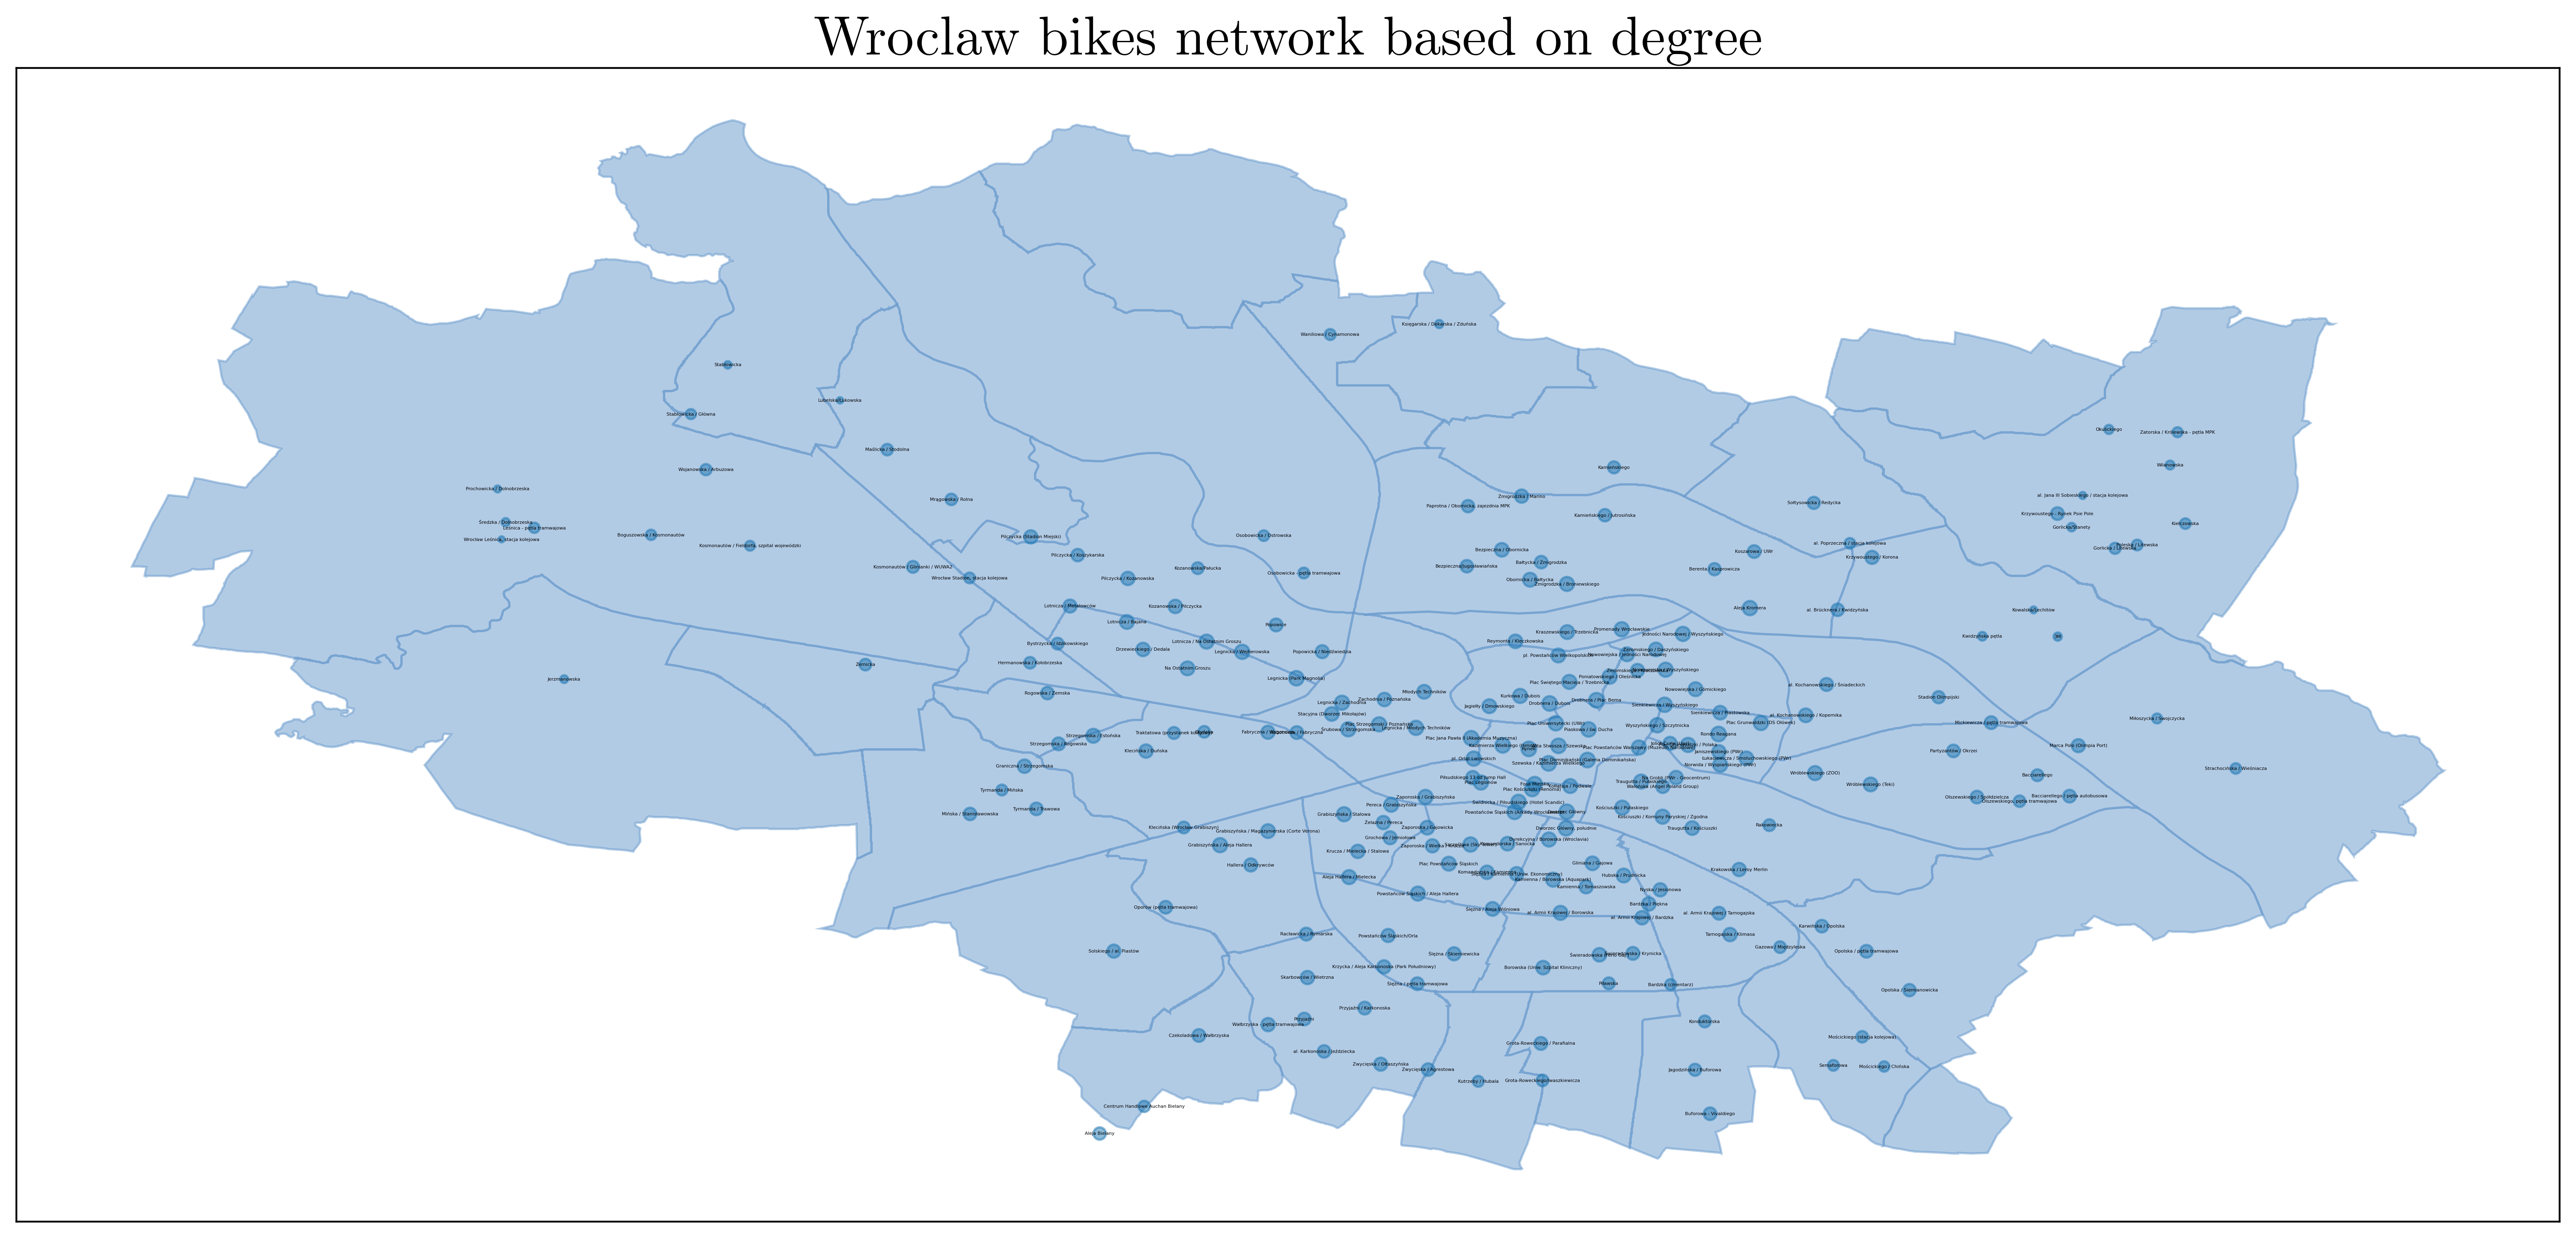

In [12]:
import ast

degrees = dict(nx.degree(graph))
df_coordinates = df_geo_location_bicycle_dataset[["station_name", "coordinates"]]
df_coordinates = df_coordinates.set_index("station_name")
df_coordinates['coordinates'] = df_coordinates['coordinates'].apply(lambda x: ast.literal_eval(x))
stations_positions = df_coordinates.to_dict()["coordinates"]

BLUE = "#6699cc"

fig = plt.figure(figsize=(16, 9), dpi=400)
plt.title("Wroclaw bikes network based on degree", fontsize=24)
ax = fig.gca()

for i in range(len(polygons)):
    coordinates = polygons[i]["geometry"]["coordinates"]
    poly = {"type": "Polygon", "coordinates": coordinates}
    ax.add_patch(PolygonPatch(poly, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2))
    ax.axis("scaled")

nx.draw_networkx_nodes(
    G=graph,
    pos=stations_positions,
    nodelist=graph.nodes(),
    alpha=0.5,
    ax=ax,
    node_size=[
        0.1 * degrees[node] for node in graph.nodes()
    ],
)
# nx.draw_networkx_edges(
#     G=graph, pos=stations_positions, alpha=0.05, ax=ax, arrows=True, connectionstyle="arc3,rad=0.1"
# )
nx.draw_networkx_labels(
    G=graph,
    pos=stations_positions,
    font_size=2,
    labels={node: node for node in graph.nodes()},
)

plt.draw()
plt.tight_layout()
plt.savefig(
    "../images/Wroclaw_bikes_network_degree.png",
    bbox_inches="tight",
    dpi=400,
)